## Step-1:Data pre-processing step

In [1]:
print("Brijesh vaishnav")

Brijesh vaishnav


1. Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Importing the dataset using pandas library

In [3]:
data=pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3. Handling the missing values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--> Handling the missing values in 'Age' variable

In [7]:
# percent of missing "Age" 
missing_age_percentage = (data['Age'].isnull().sum() / data.shape[0]) * 100

#printing the percentage
print('Percent of missing "Age" records is ' ,missing_age_percentage,"%")

Percent of missing "Age" records is  19.865319865319865 %


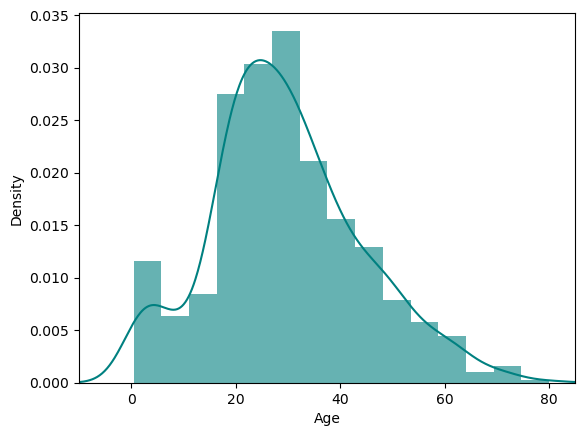

In [8]:
# Assuming you have a list or array containing the 'Age' data
age_data = data["Age"]

# Create a histogram
plt.hist(age_data, bins=15, density=True, stacked=True, color='teal', alpha=0.6)

# Create a kernel density plot
age_data.plot(kind='kde', color='teal')

# Set the x-axis label
plt.xlabel('Age')

# Set the x-axis limit
plt.xlim(-10, 85)

# Show the plot
plt.show()


Here, we have seen from above grapn it is right skewed so using mean should gives biased results so for this we use 'median'.

In [9]:
# mean age
print('The mean of "Age" is ' ,(data["Age"].mean(skipna=True)))

# median age
print('The median of "Age" is' ,(data["Age"].median(skipna=True)))

The mean of "Age" is  29.69911764705882
The median of "Age" is 28.0


--> Handling the missing values in 'cabin'

In [10]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is ' ,((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is  77.10437710437711


--> Handling the missing values in 'embarked'

In [11]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is ', ((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Embarked" records is  0.22446689113355783


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


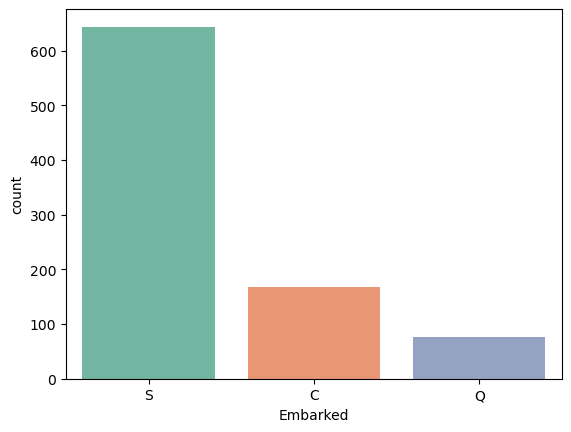

In [12]:
#There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(data['Embarked'].value_counts())

#plotting graph
sns.countplot(x='Embarked', data=data, palette='Set2')
plt.show()

In [13]:
print('The most common boarding port of embarkation is', data['Embarked'].value_counts().idxmax())

#By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

The most common boarding port of embarkation is S


## --> Final Adjustments to remove missing values

In [14]:
#If "Age" is missing for a given row, I'll impute with 28 (median age).
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)

#I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, 
#it appears that this value is associated with the passenger's class and fare paid.
data.drop('Cabin', axis=1, inplace=True)

#If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Hence all missing values has been removed from the dataset.

## Step-2: Adjustment of some additional variables

SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), 
we will combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [16]:
## Create categorical variable for traveling alone
data['TravelAlone']=np.where((data["SibSp"]+data["Parch"])>0, 0, 1)

#dropping the 'SibSp' and 'Parch' variables
data.drop('SibSp', axis=1, inplace=True)
data.drop('Parch', axis=1, inplace=True)

In [17]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1


## Step-3: Creating the dummy variables for variables like Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked") to simple the dataset

In [18]:
#create categorical variables and drop some variables
data1=pd.get_dummies(data, columns=["Pclass","Embarked","Sex"])

In [19]:
data1.head(1)

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.25,0,0,0,1,0,0,1,0,1


## --> Dropping the unwanted variables

In [20]:
data1.drop('Sex_female', axis=1, inplace=True)
data1.drop('Pclass_3', axis=1, inplace=True)
data1.drop('Embarked_S', axis=1, inplace=True)
data1.drop('PassengerId', axis=1, inplace=True)
data1.drop('Name', axis=1, inplace=True)
data1.drop('Ticket', axis=1, inplace=True)

## --> Dataset after dropping the variables

In [21]:
data1.head(4)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,0,22.0,7.2500,0,0,0,0,0,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,0,0
3,1,35.0,53.1000,0,1,0,0,0,0


## Step-4: Extracting the independent and dependent variables

In [22]:
#independent variable dataset
x=data1.iloc[:,[1,2,3,4,5,6,7,8]]
x.head(4)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,22.0,7.2500,0,0,0,0,0,1
1,38.0,71.2833,0,1,0,1,0,0
2,26.0,7.9250,1,0,0,0,0,0
3,35.0,53.1000,0,1,0,0,0,0


In [23]:
#dependent variable dataset
y=data1.iloc[:,0]
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

## Step-5: Splitting the dataset into Training and Testing dataset

In [24]:
#importing the train_test_split class from the scikit-learn library of model_selection
from sklearn.model_selection import train_test_split

#splitting into objects
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.head(3)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
140,28.0,15.2458,0,0,0,1,0,0
439,31.0,10.5000,1,0,1,0,0,1
817,31.0,37.0042,0,0,1,1,0,1


In [26]:
x_test.head(2)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
495,28.0,14.4583,1,0,0,1,0,1
648,28.0,7.5500,1,0,0,0,0,1


In [27]:
y_train.head(2)

140    0
439    0
Name: Survived, dtype: int64

In [28]:
y_test.head(2)

495    0
648    0
Name: Survived, dtype: int64

## Step-6: Fitting Logistic Regression to the Training set:

In [29]:
#importing the logistic regression class from scikit-learn library
from sklearn.linear_model import LogisticRegression

#create an instance
classifier=LogisticRegression()

#fitting the training dataset
classifier.fit(x_train,y_train)

C:\Users\hp\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step-7:Predicting the Test Result

In [30]:
#predicting the test result
y_pred=classifier.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

## Step-8: Test accuracy of the result

In [32]:
##importing the classification_report class from scikit-learn.metrics library
from sklearn.metrics import classification_report

classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.84      0.84       110\n           1       0.74      0.74      0.74        69\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

For accuracy measurement we form the confusion matrix

In [33]:
#importing the confusion matrix class from scikit-learn.metrics library
from sklearn.metrics import confusion_matrix

#create the instance
cm=confusion_matrix(y_test,y_pred)

#printing the confusion matrix
cm

array([[92, 18],
       [18, 51]], dtype=int64)

## Step-9:Finding the Accouracy of model

In [34]:
#importing the accuracy score class from the scikit-learn library
from  sklearn.metrics import accuracy_score

#create the instance
accuracy=accuracy_score(y_test,y_pred)

#printing the accuracy
print("Accuracy:",accuracy*100,"%")

Accuracy: 79.88826815642457 %


## Hence,the accuracy of the model is approximate 80%.